# Data Sourcing

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("Data.csv")

In [3]:
#Explore the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.shape

(110527, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
noShowRate = df["No-show"].value_counts()
print(noShowRate)
print(noShowRate/len(df) * 100)

No-show
No     88208
Yes    22319
Name: count, dtype: int64
No-show
No     79.806744
Yes    20.193256
Name: count, dtype: float64


##### Note : It seems 88208 or 79.8% patients did show up for their appointments whereas 22319 or 20% patients didn't show up for their appointments.

<Axes: ylabel='No-show'>

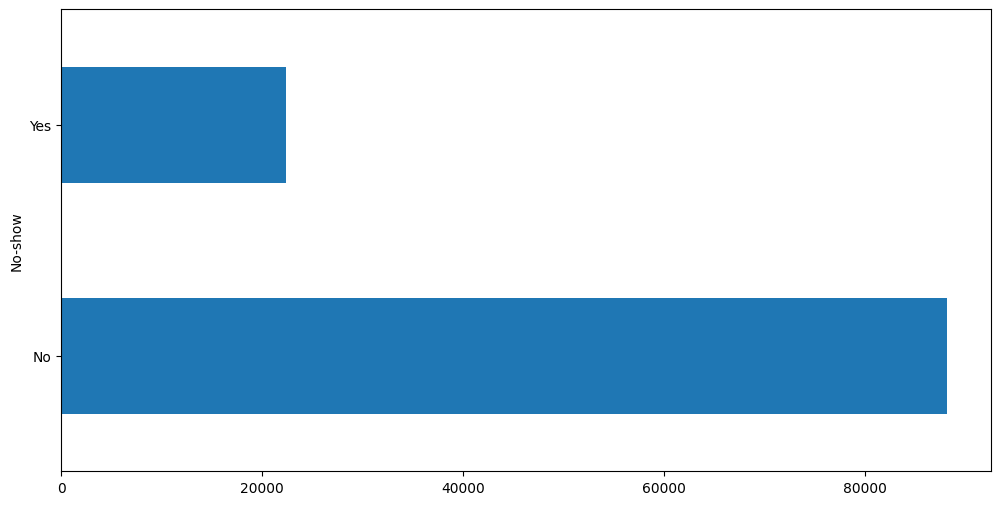

In [9]:
# Let's plot the No-show for clear insights
noShowRate.plot(kind="barh", figsize=(12, 6))

# Data Cleaning

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


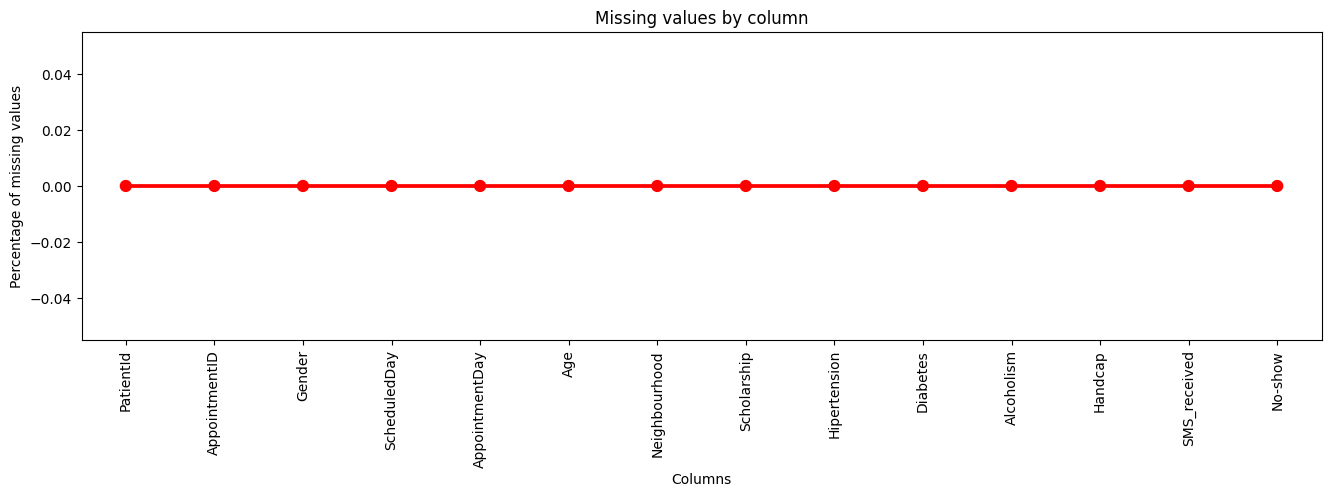

In [10]:
# Create pointplot to visualize missing values in the df

missingPercentage = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(16, 4))
sns.pointplot(x = missingPercentage.index, y=missingPercentage.values, color='red')
plt.xticks(rotation = 90)
plt.xlabel("Columns")
plt.ylabel("Percentage of missing values")
plt.title("Missing values by column")
plt.show()

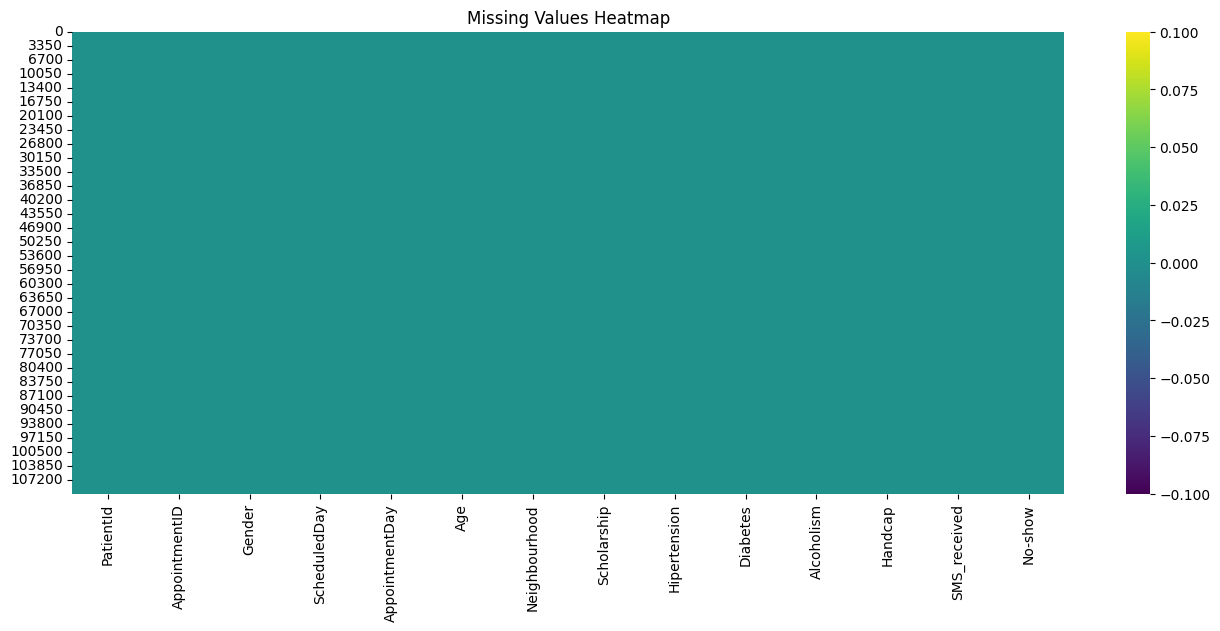

In [11]:
# Create heatmap to visualize missing values in the df

plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
newDf = df.copy()
newDf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
print(newDf["Age"].min(), newDf["Age"].max())
print(newDf["ScheduledDay"].min() , newDf["ScheduledDay"].max())
print(newDf["AppointmentDay"].min() , newDf["AppointmentDay"].max())

-1 115
2015-11-10T07:13:56Z 2016-06-08T20:07:23Z
2016-04-29T00:00:00Z 2016-06-08T00:00:00Z


In [14]:
newDf.shape

(110527, 14)

In [15]:
newDf = newDf[newDf["Age"] > 0]
newDf.shape

(106987, 14)

In [16]:
# Let's group Age, ScheduledDay and AppointmentDay

# Group Age column
ageBins = [0, 20, 40, 60, 80, 100, 120]
ageLabels = ["0 - 20", "21 - 40", "41 - 60", "61 - 80", "81 - 100", "101 - 120"]

newDf["ageGroup"] = pd.cut(newDf["Age"], bins=ageBins, labels=ageLabels)

# Group ScheduledDay column
# Convert ScheduledDay columns into correct datetime format.
newDf["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
scheduleBins = pd.date_range(start= newDf['ScheduledDay'].min(), end=newDf['ScheduledDay'].max(), freq='M')

newDf['ScheduledDayGroup'] = pd.cut(newDf['ScheduledDay'], bins=scheduleBins)

# Group AppointmentDay column
# Convert AppointmentDay columns into correct datetime format.
newDf["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
appointmentBins = pd.date_range(start= newDf['AppointmentDay'].min(), end=newDf['AppointmentDay'].max(), freq='W')

newDf['AppointmentDayGroup'] = pd.cut(newDf['AppointmentDay'], bins=appointmentBins)

newDf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ageGroup,ScheduledDayGroup,AppointmentDayGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,61 - 80,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,41 - 60,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,61 - 80,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 - 20,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,41 - 60,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN


In [17]:
# Let's remove the unnecessory column

columnsToDrop = ["PatientId","AppointmentID", "ScheduledDay", "AppointmentDay", "Age"]

newDf.drop(columns=columnsToDrop, inplace=True)
newDf.head()

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ageGroup,ScheduledDayGroup,AppointmentDayGroup
0,F,JARDIM DA PENHA,0,1,0,0,0,0,No,61 - 80,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
1,M,JARDIM DA PENHA,0,0,0,0,0,0,No,41 - 60,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
2,F,MATA DA PRAIA,0,0,0,0,0,0,No,61 - 80,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
3,F,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 - 20,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
4,F,JARDIM DA PENHA,0,1,1,0,0,0,No,41 - 60,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN


In [18]:
newDf.shape

(106987, 12)

##### There is no null values in this dataframe

# Univariate Analysis

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

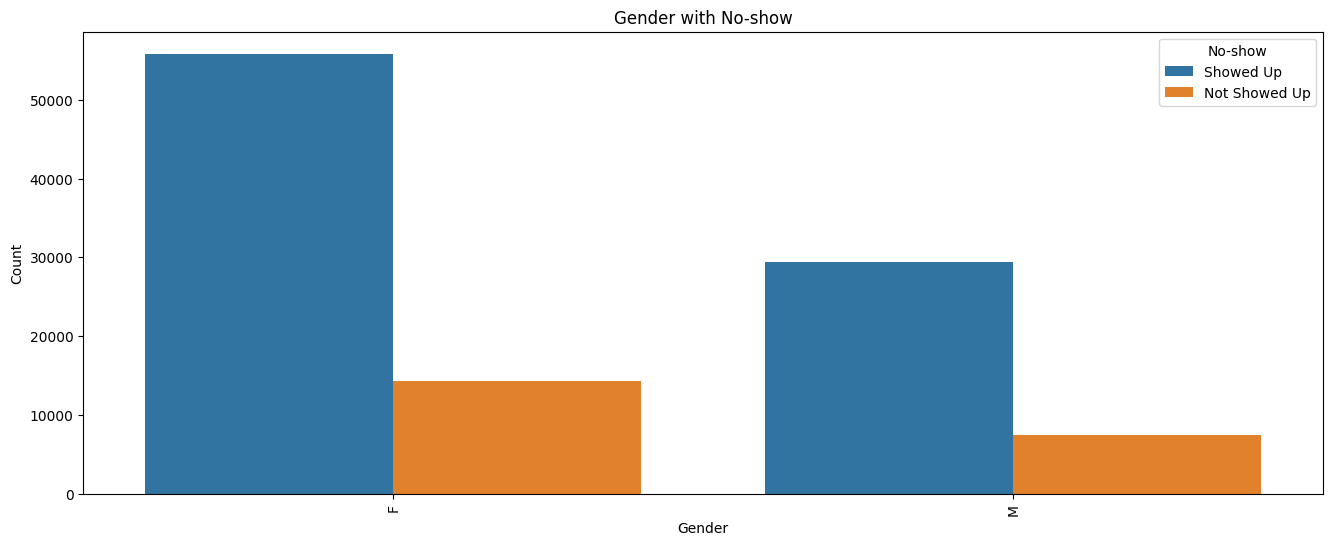

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

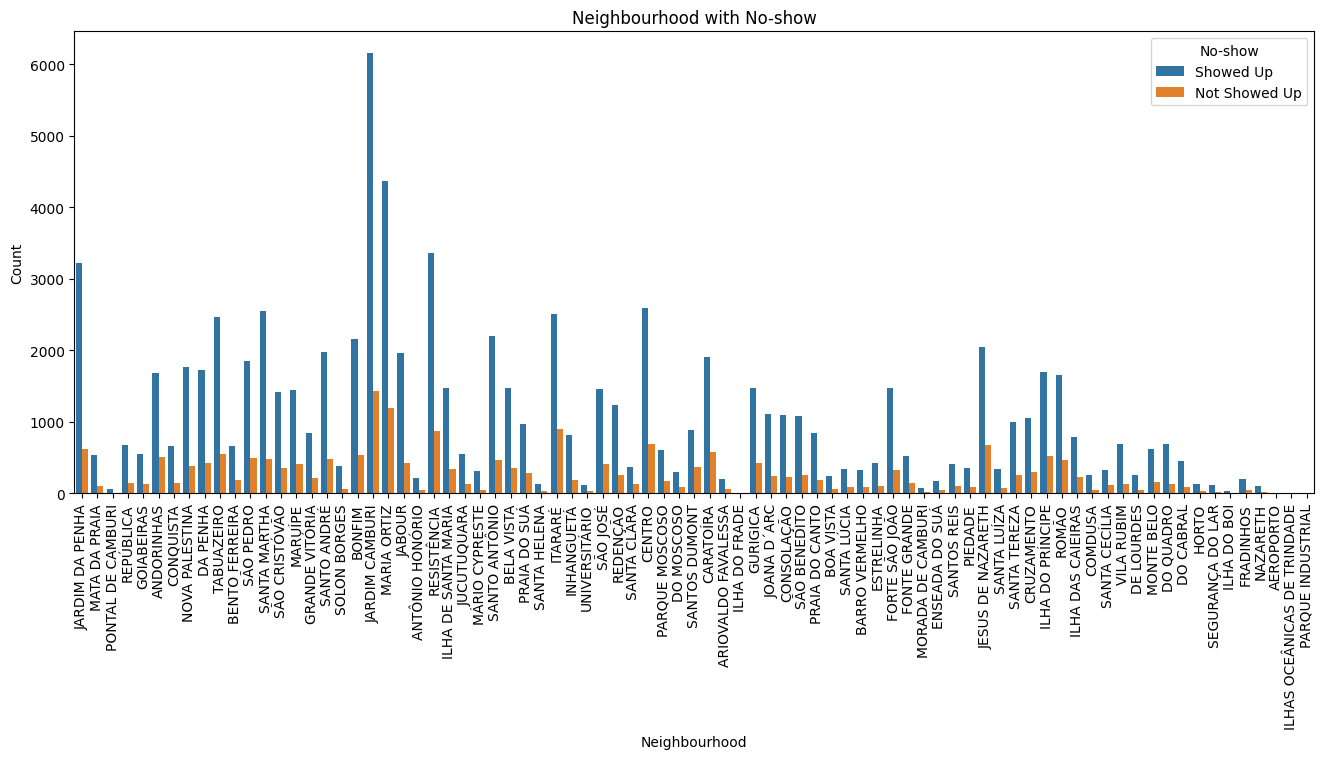

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

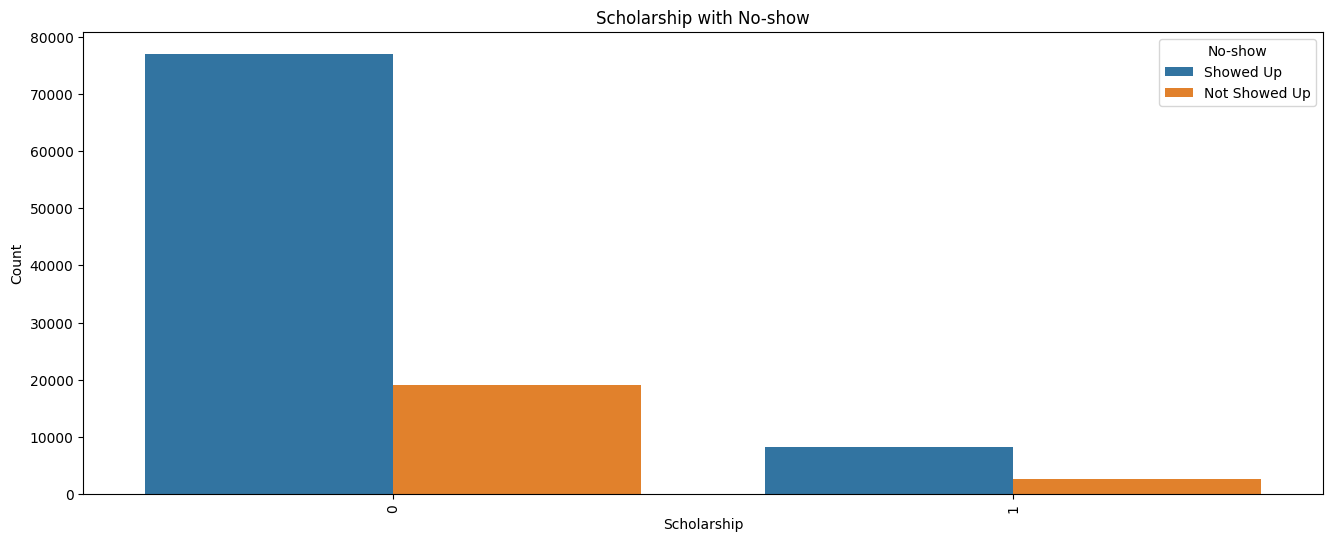

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

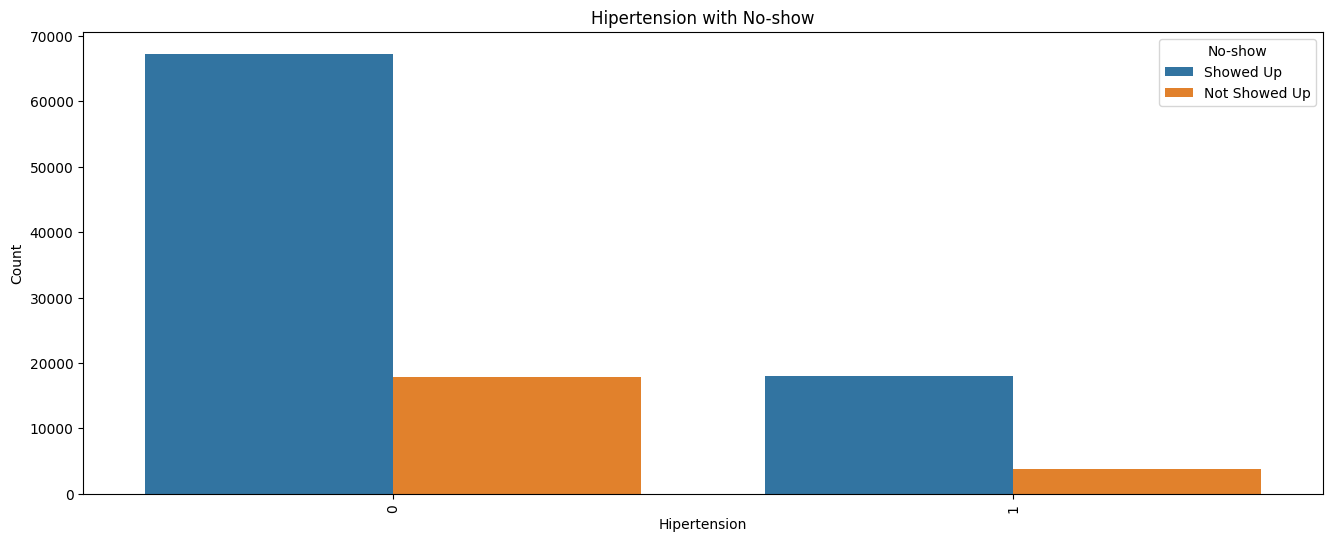

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

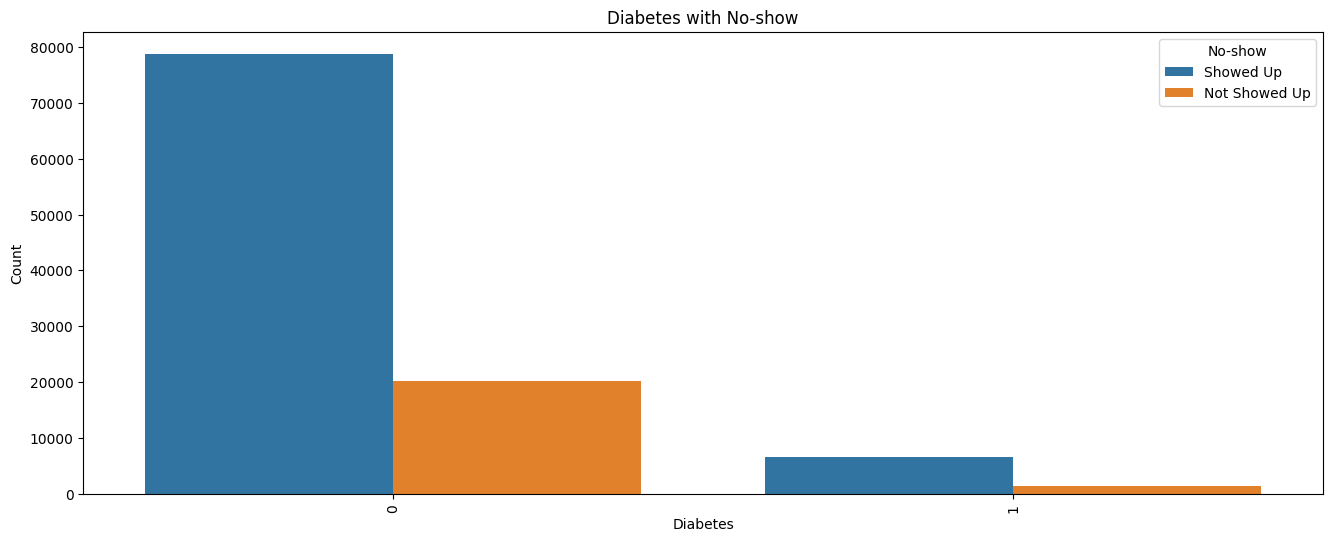

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

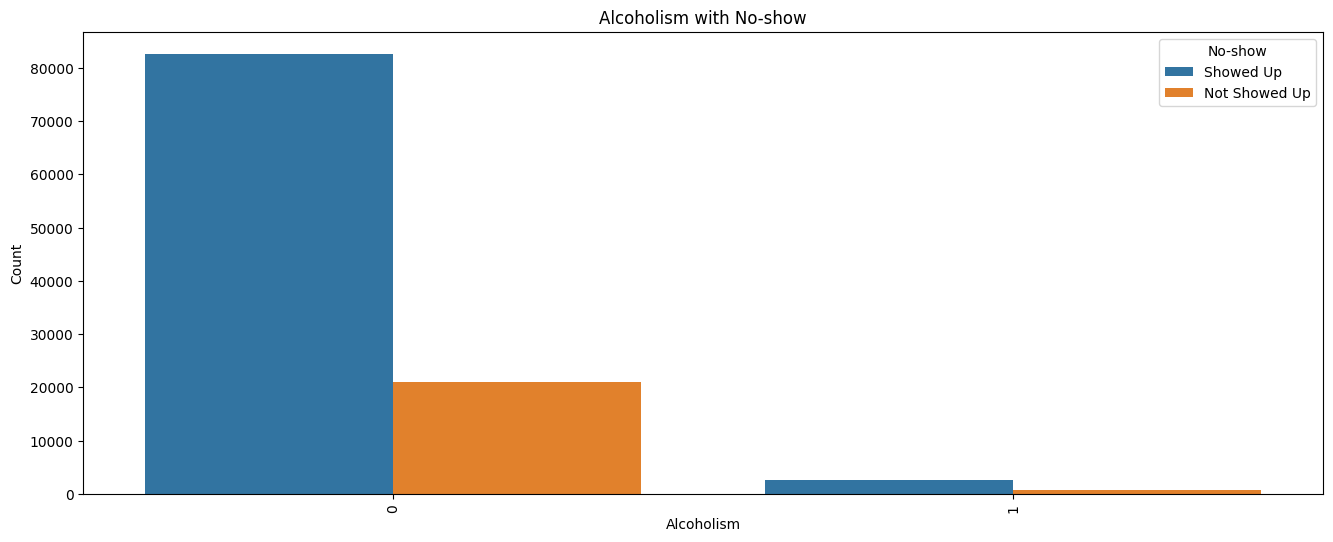

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

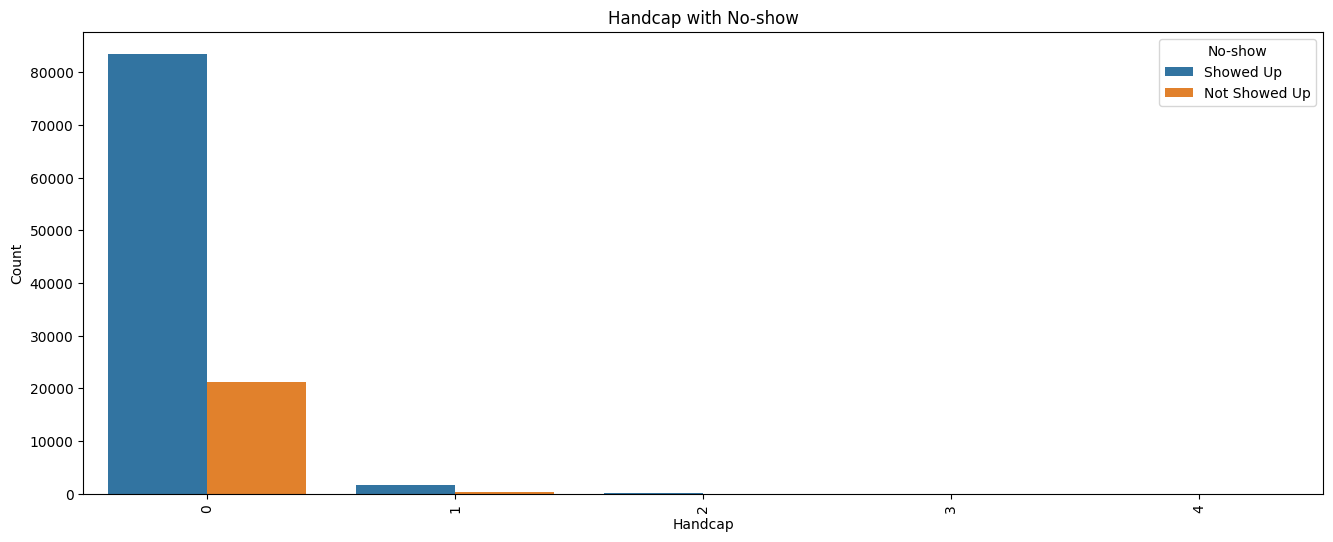

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

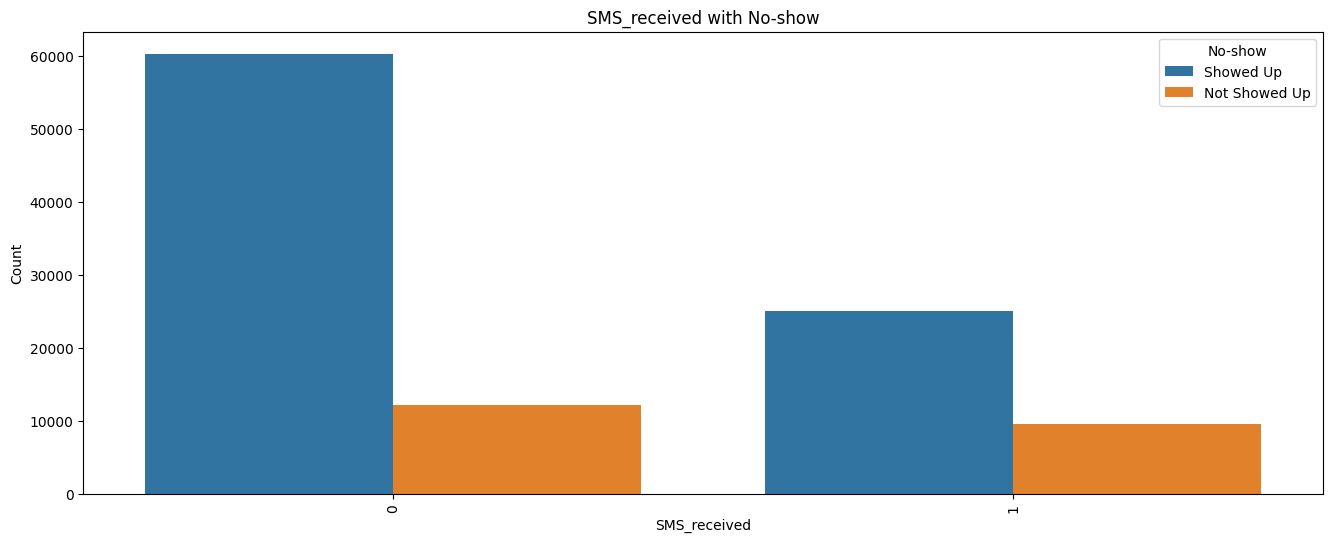

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to ret

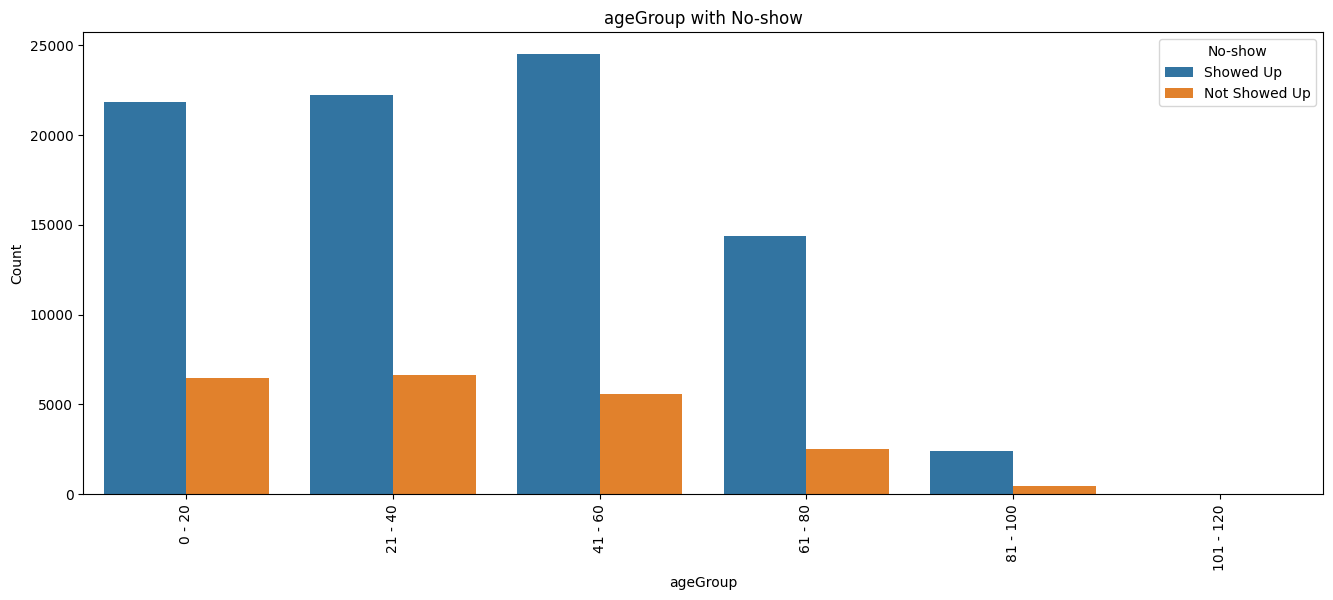

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


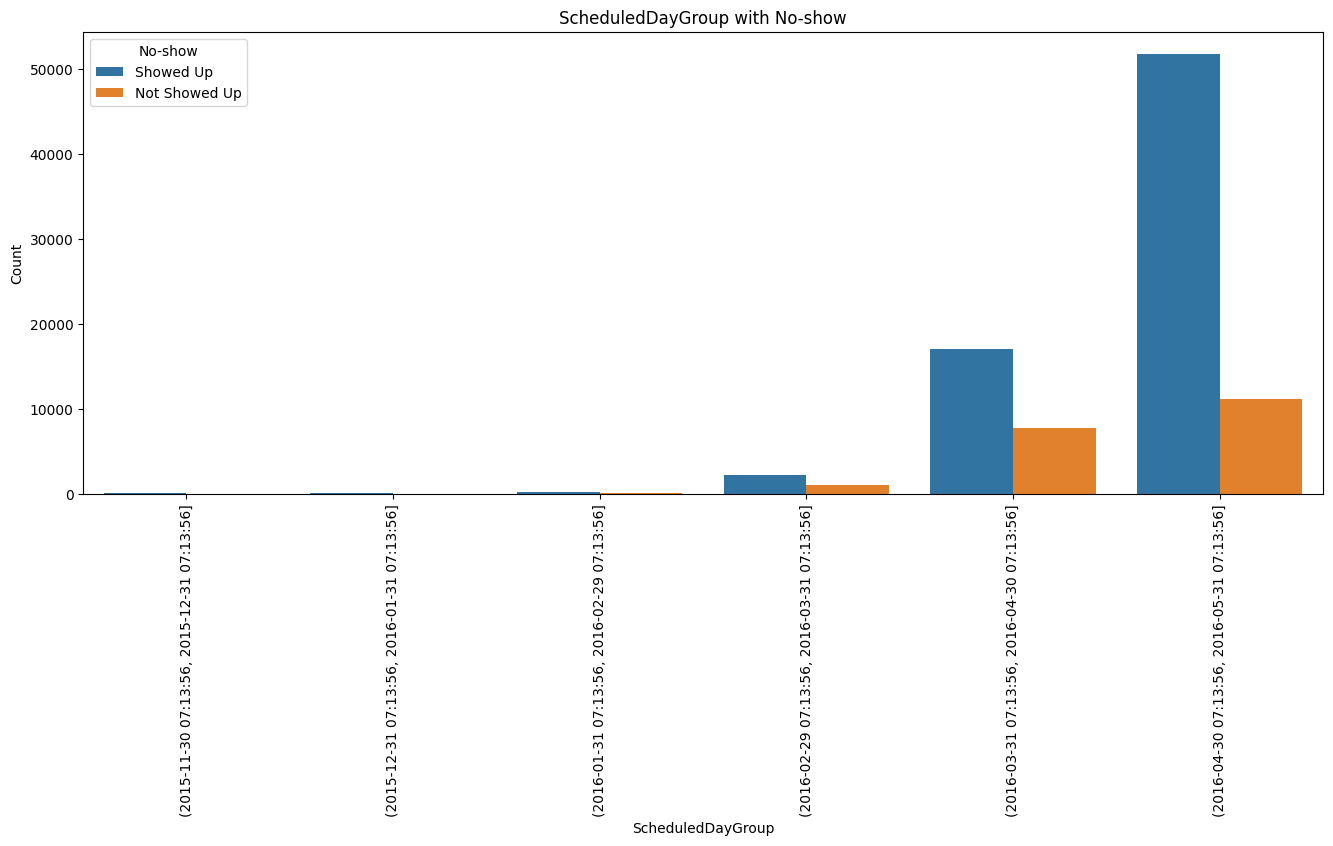

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


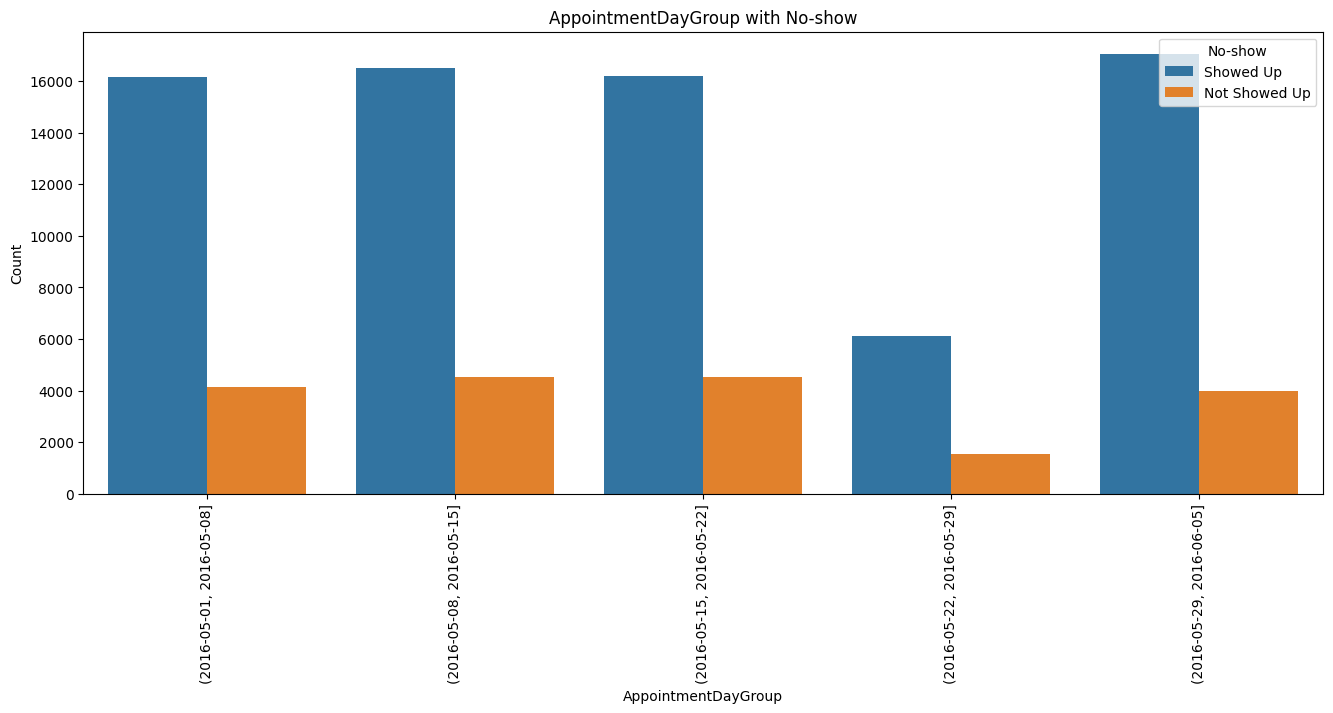

In [19]:
# categoricalColumns = ['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show']
for column in newDf.drop(columns="No-show"):
    plt.figure(figsize=(16, 6))
    sns.countplot(data=newDf, x=column, hue="No-show")
    plt.title(column+ " with No-show")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation = 90)
    plt.legend(title = "No-show", labels = ["Showed Up", "Not Showed Up"])
    plt.show()

In [20]:
# For neighbourhood column, Let's find the percentage of No show patients to get the clear insights

# Calculate the percentage of 'No-show' for each neighborhood
neighborhood_no_show_percentage = df.groupby('Neighbourhood')['No-show'].value_counts(normalize=True).unstack().fillna(0)['Yes'] * 100

# Sort the neighborhoods by percentage of 'No-show'
neighborhood_no_show_percentage = neighborhood_no_show_percentage.sort_values(ascending=False)

# Display the neighborhood percentages
print(neighborhood_no_show_percentage)


Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    100.000000
SANTOS DUMONT                   28.918495
SANTA CECÍLIA                   27.455357
SANTA CLARA                     26.482213
ITARARÉ                         26.266363
                                  ...    
SOLON BORGES                    14.712154
MÁRIO CYPRESTE                  14.555256
AEROPORTO                       12.500000
ILHA DO BOI                      8.571429
PARQUE INDUSTRIAL                0.000000
Name: Yes, Length: 81, dtype: float64


In [21]:
# Filter neighborhoods with > 20% 'No-show' percentage
neighborhoods_gt_20_percent = neighborhood_no_show_percentage[neighborhood_no_show_percentage > 20]

# Display the filtered neighborhoods
print(neighborhoods_gt_20_percent.shape)
print(neighborhoods_gt_20_percent.head(15))



(36,)
Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    100.000000
SANTOS DUMONT                   28.918495
SANTA CECÍLIA                   27.455357
SANTA CLARA                     26.482213
ITARARÉ                         26.266363
JESUS DE NAZARETH               24.395373
HORTO                           24.000000
ILHA DO PRÍNCIPE                23.477493
CARATOÍRA                       23.040936
ANDORINHAS                      23.032714
PRAIA DO SUÁ                    22.826087
GURIGICA                        22.596630
BENTO FERREIRA                  22.494172
PARQUE MOSCOSO                  22.319202
MARUÍPE                         22.292324
Name: Yes, dtype: float64


##### Report : 
###### Gender - No insights

###### Appointment Day - No insights

###### Scheduled Day - Scheduled From 2016-02-29 to 2016-04-30 are more likely (34%) not showing up

###### Neighbourhood - SANTOS DUMONT, SANTA CECÍLIA, SANTA CLARA, ITARARÉ, JESUS DE NAZARETH, HORTO, ILHA DO PRÍNCIPE, CARATOÍRA, ANDORINHAS are more likely (23% - 28%) not showing up

###### Scholorship - No insights

###### Hypertension - No insights

###### Diabetes - Diabetes patients are more likely (25%) not showing up.

###### Alcoholism - Alcoholic patients are more likely (25%) not showing up.

###### Handcap - Mild level of handcap or disability patients are more likely(25%) not showing up.

###### SMS received - Patients who receiving reminders are more likely(28%) not showing up.

###### Age Group - 0 to 40 patients are more likey(25%) not showing up.


# Bivariate Analysis

In [22]:
showUpDf = newDf.loc[newDf["No-show"] == "No"]
notShowUpDf = newDf.loc[newDf["No-show"] == "Yes"]

print(len(showUpDf), ",", len(notShowUpDf))

85307 , 21680


/var/folders/fk/5jlbww4x7c57wsvwj4p9ppbc0000gn/T/ipykernel_88695/3778696828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notShowUpDf['Diabetes'] = notShowUpDf['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})
/var/folders/fk/5jlbww4x7c57wsvwj4p9ppbc0000gn/T/ipykernel_88695/3778696828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notShowUpDf["Alcoholism"] = notShowUpDf["Alcoholism"].map({0 : "Not an Alcoholic", 1 : "Alcoholic"})
/var/folders/fk/5jlbww4x7c57wsvwj4p9ppbc0000gn/T/ipykernel_88695/3

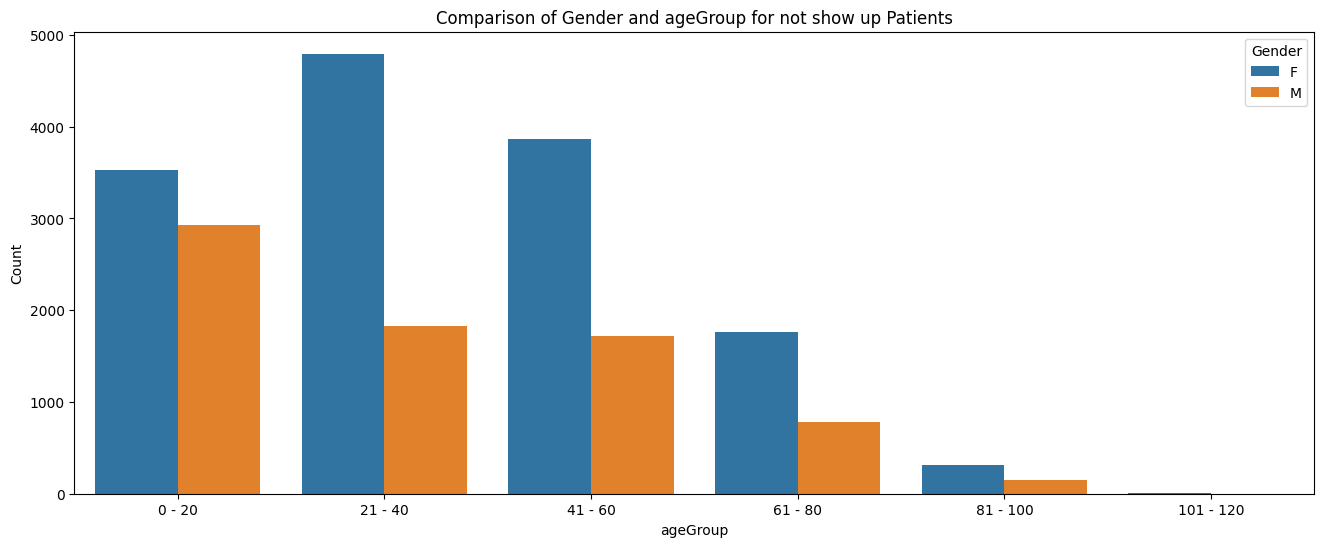

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

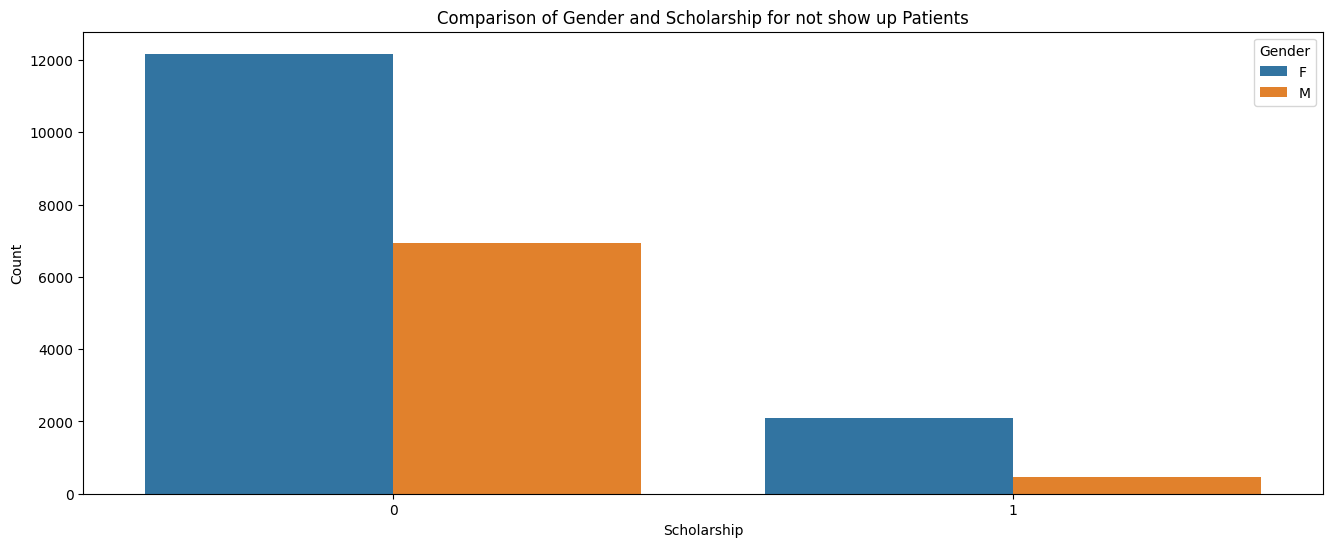

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

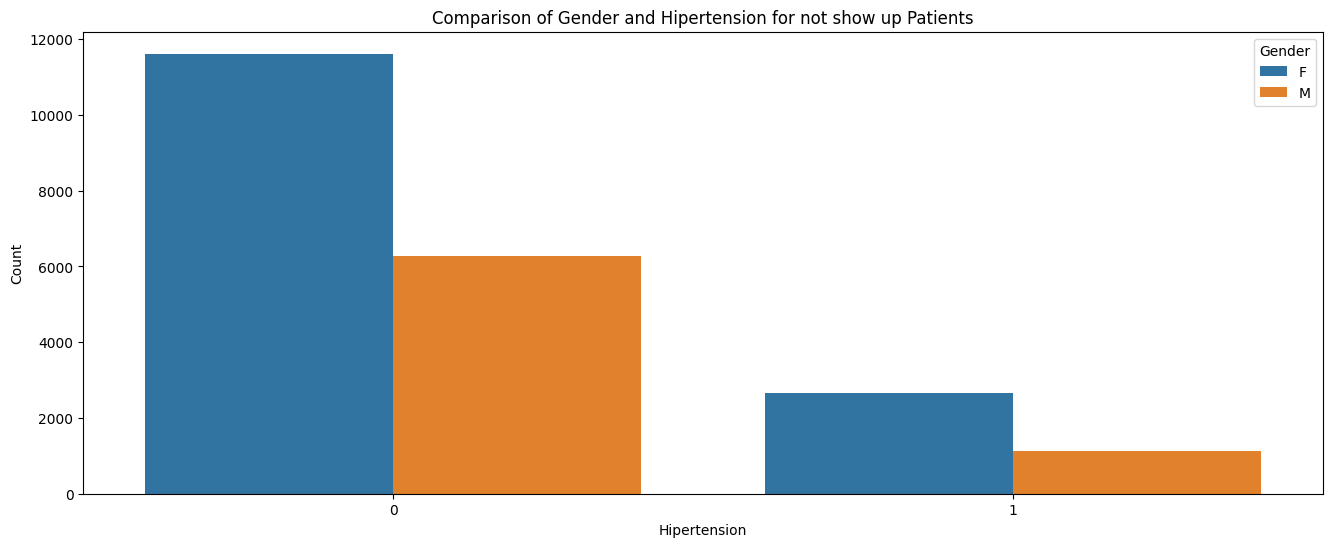

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

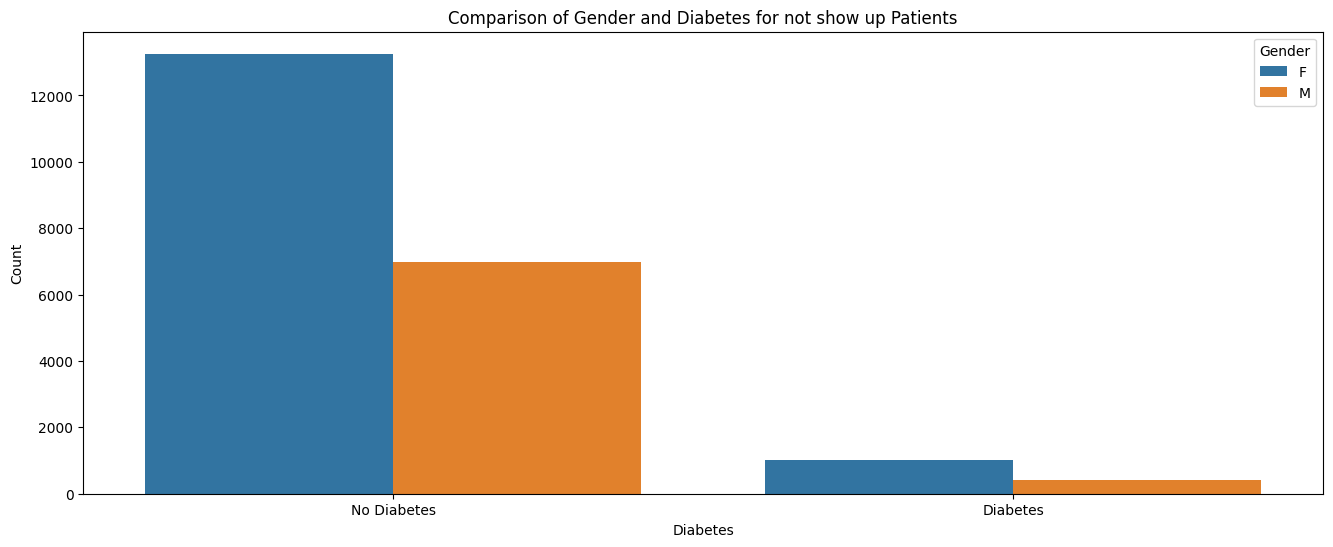

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

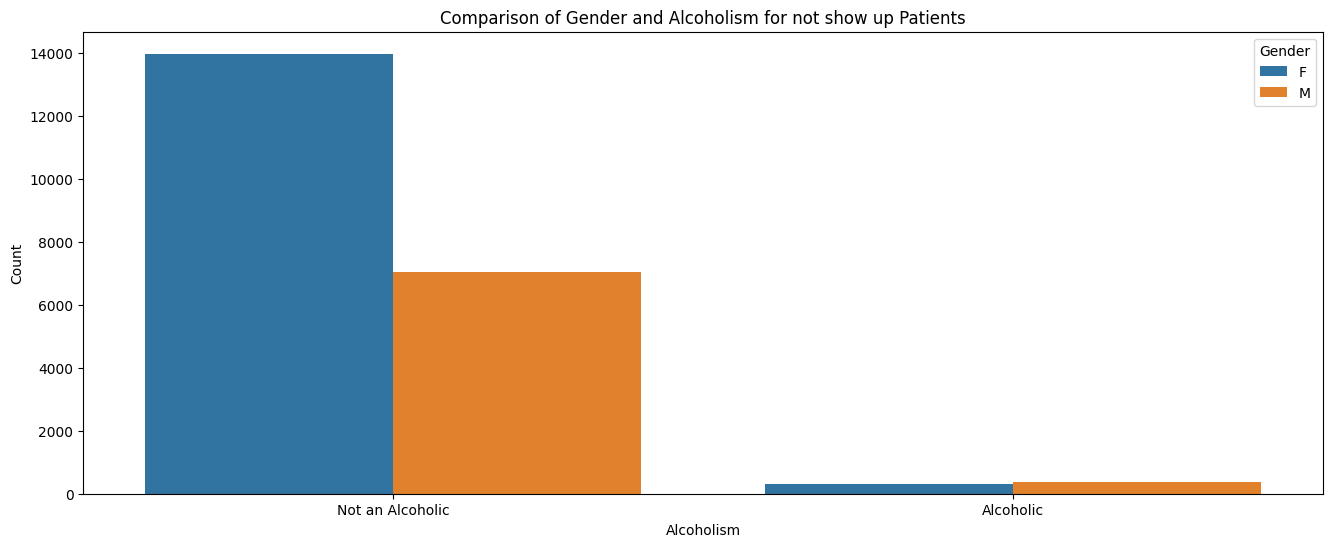

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

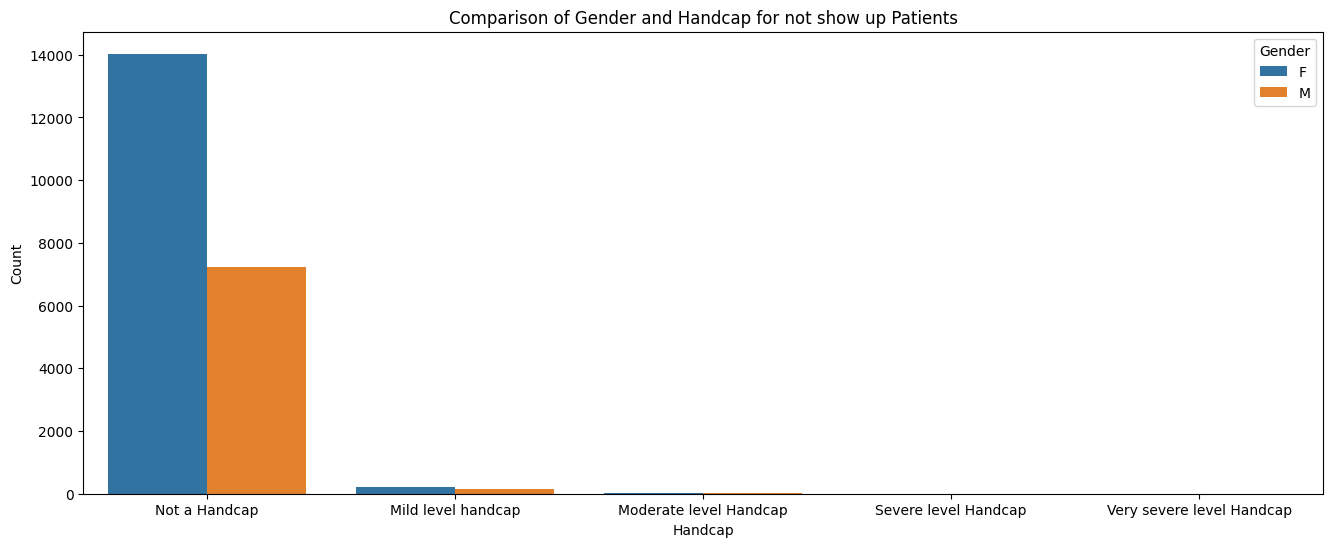

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

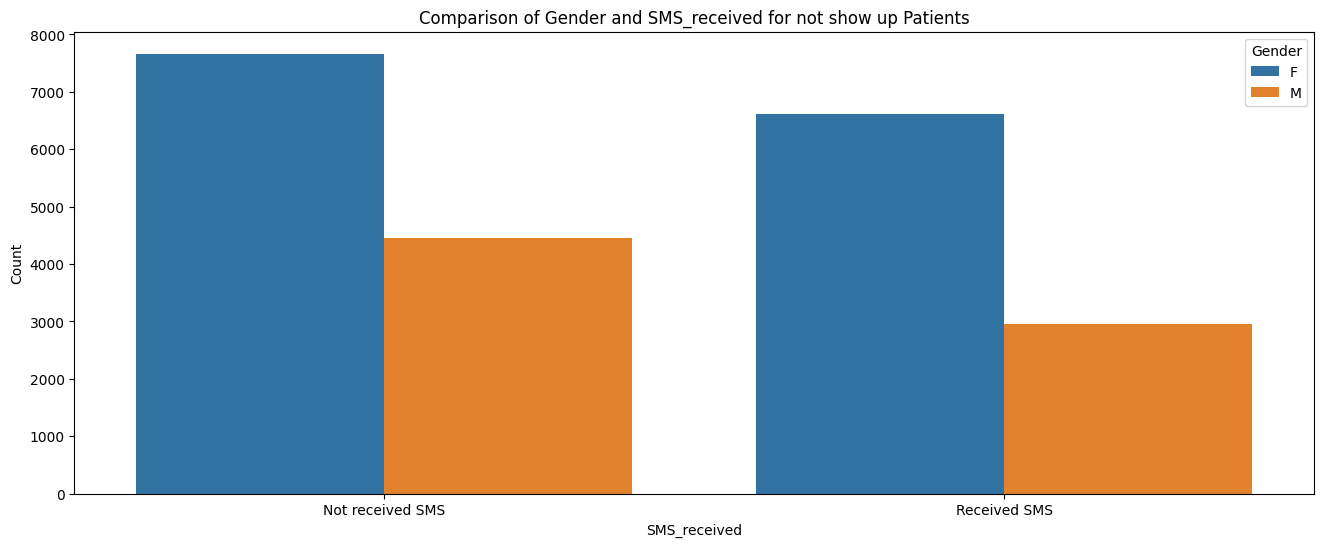

In [23]:
notShowUpDf['Diabetes'] = notShowUpDf['Diabetes'].map({0: 'No Diabetes', 1: 'Diabetes'})
notShowUpDf["Alcoholism"] = notShowUpDf["Alcoholism"].map({0 : "Not an Alcoholic", 1 : "Alcoholic"})
notShowUpDf["Handcap"] = notShowUpDf["Handcap"].map({0 : "Not a Handcap", 1 : "Mild level handcap", 2 : "Moderate level Handcap", 3 : "Severe level Handcap", 4 : "Very severe level Handcap"})
notShowUpDf["SMS_received"] = notShowUpDf["SMS_received"].map({0: 'Not received SMS', 1: 'Received SMS'})

columnsToPlot = ["ageGroup", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]
# Create a count plot for Gender and Diabetes with respect to not showed patients

for column in columnsToPlot:
    plt.figure(figsize=(16, 6))
    sns.countplot(data=notShowUpDf, x=column, hue="Gender")
    plt.title('Comparison of Gender and ' + column + ' for not show up Patients')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.show()

##### Report : 

###### Age Group 0-20 - 45% Males and 55% Females are more likely not showing up.
###### Age Group 21-40 - 28% Males and 72% Females are more likely not showing up.
###### Age Group 41-100 - 32% Males and 68% Females are more likely not showing up.
###### ------------------
###### Have a scholarship - Females are more likely not showing up
###### Don't have a scholarship - Females are more likely not showing up
###### ------------------
###### Have a Hypertension - Females are more likely not showing up
###### Don't have a Hypertension - Females are more likely not showing up
###### ------------------
###### Diabetic patients - Females are more likely not showing up
###### Non Diabetic patients - Females are more likely not showing up
###### ------------------
###### Non Alcoholic - Females are more likely not showing up
###### ------------------
###### Not a Handcap - Females are more likely not showing up
###### ------------------
###### SMS received - Females are more likely not showing up
###### Not SMS received - Females are more likely not showing up

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to ret

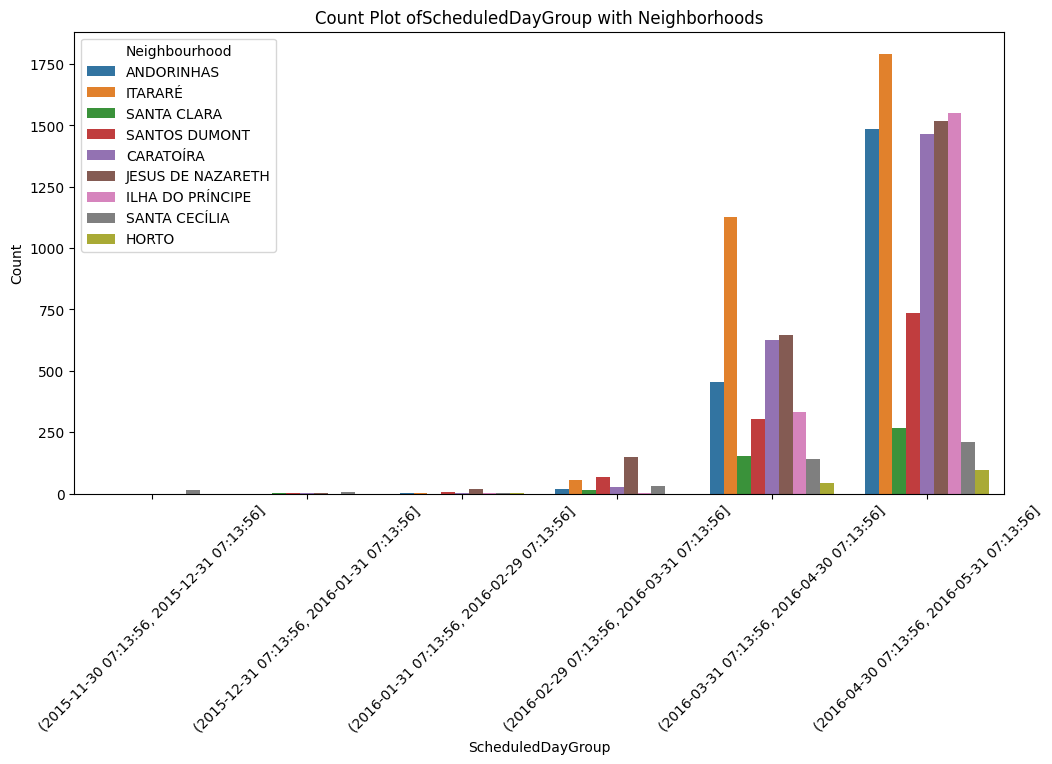

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


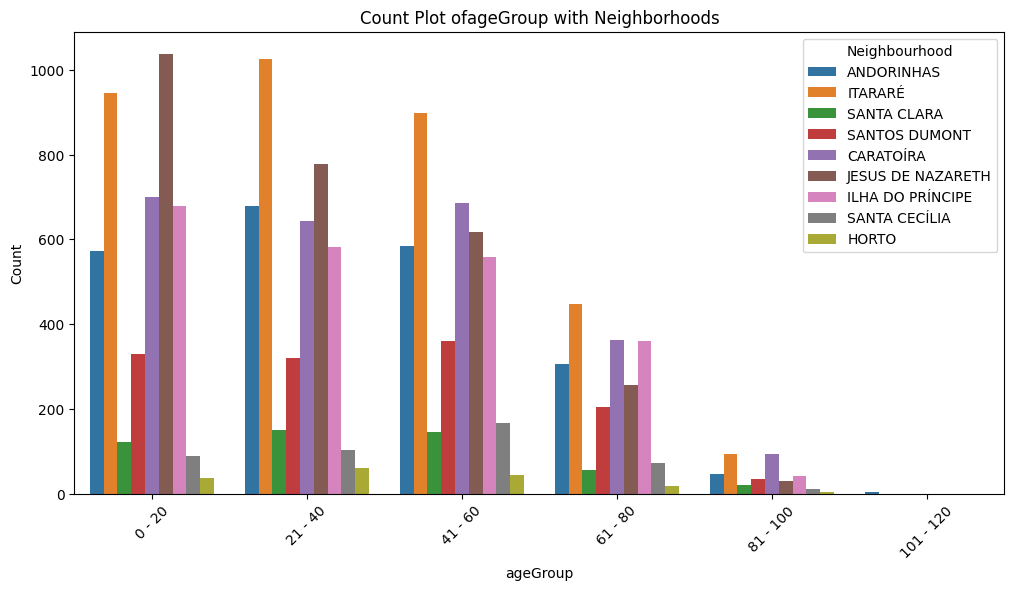

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

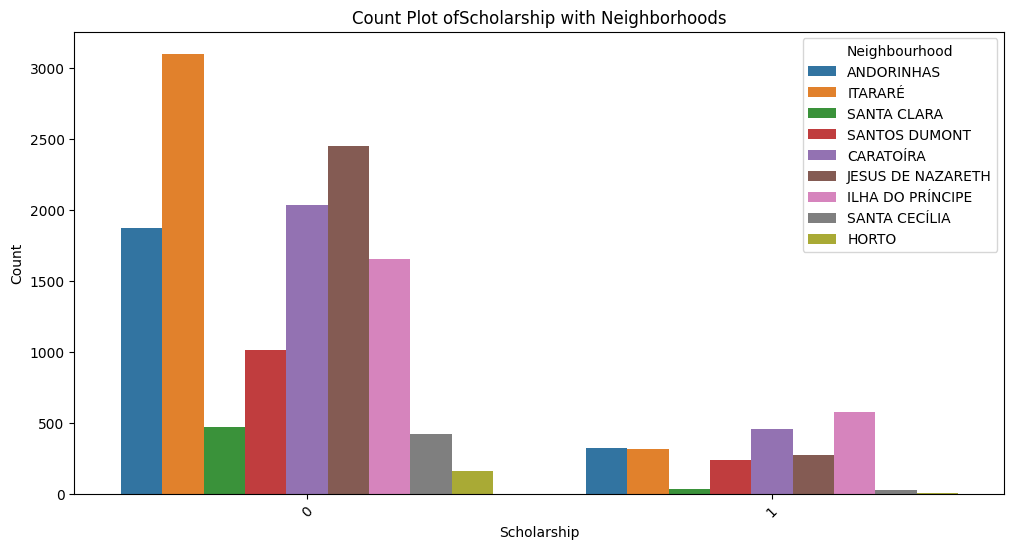

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

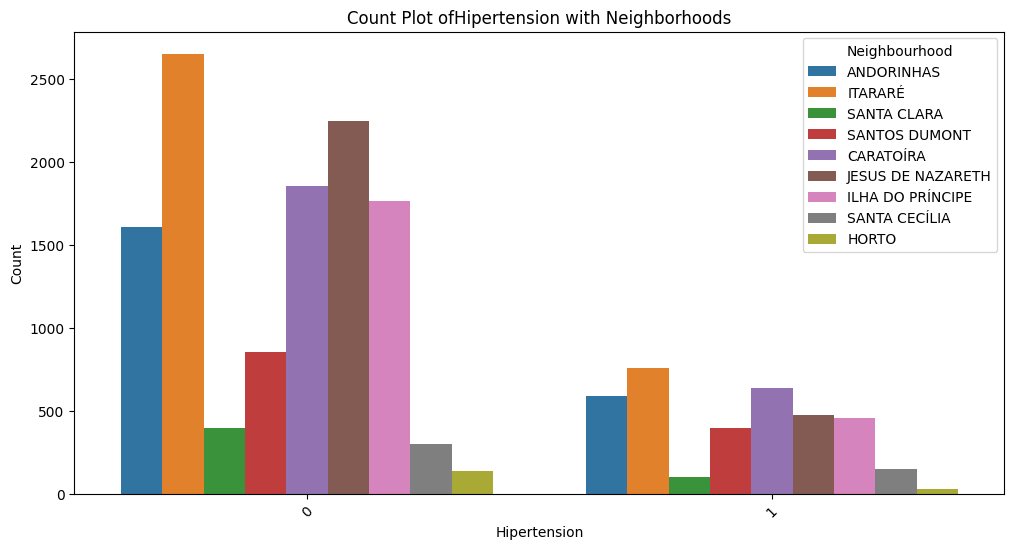

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

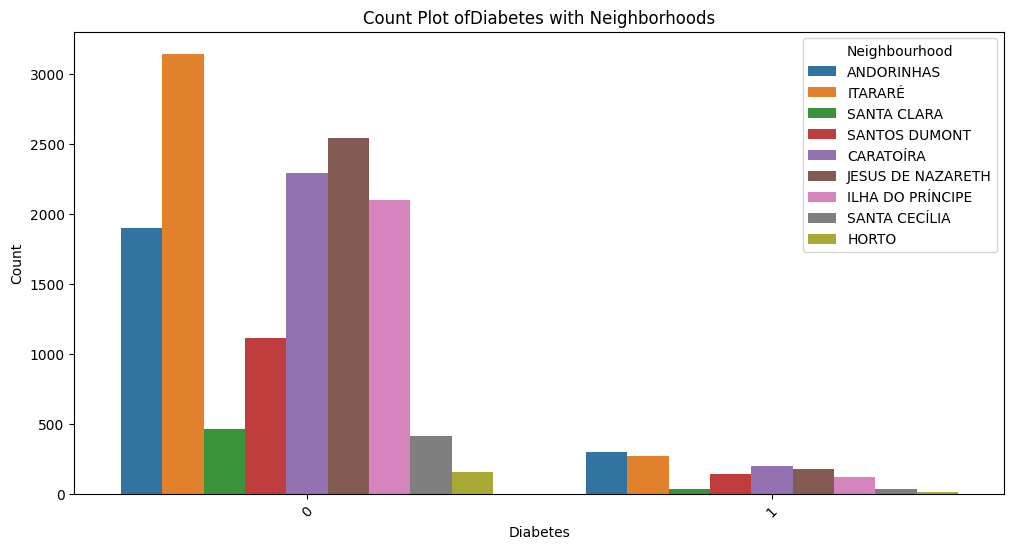

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

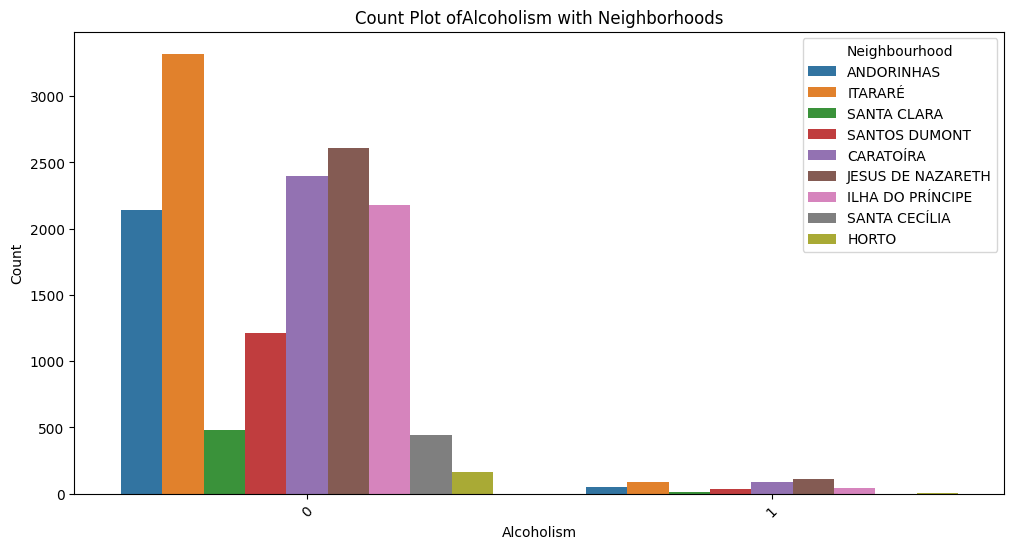

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

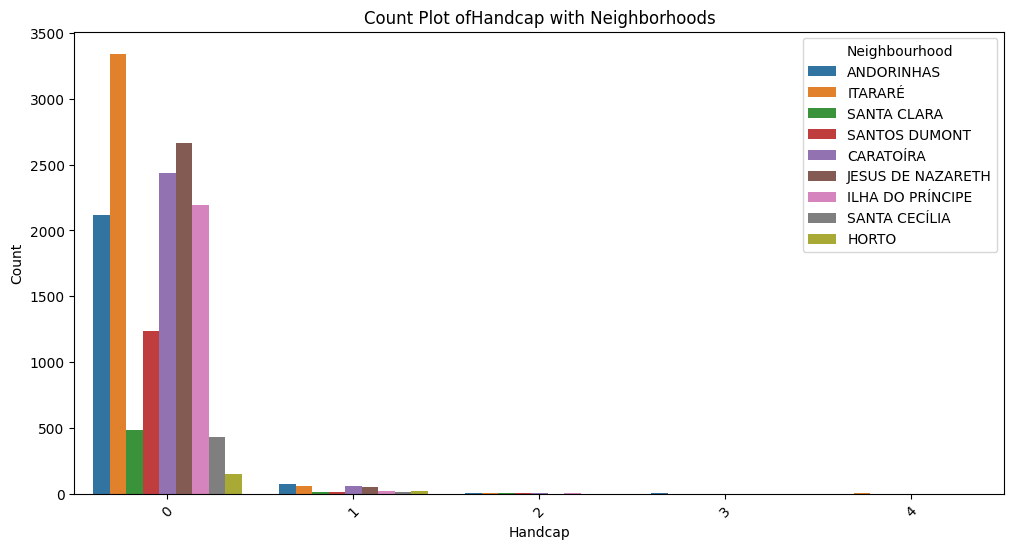

/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Pragra/Health Care - EDA/myenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sanjaykannan/Documents/Data Science - Prag

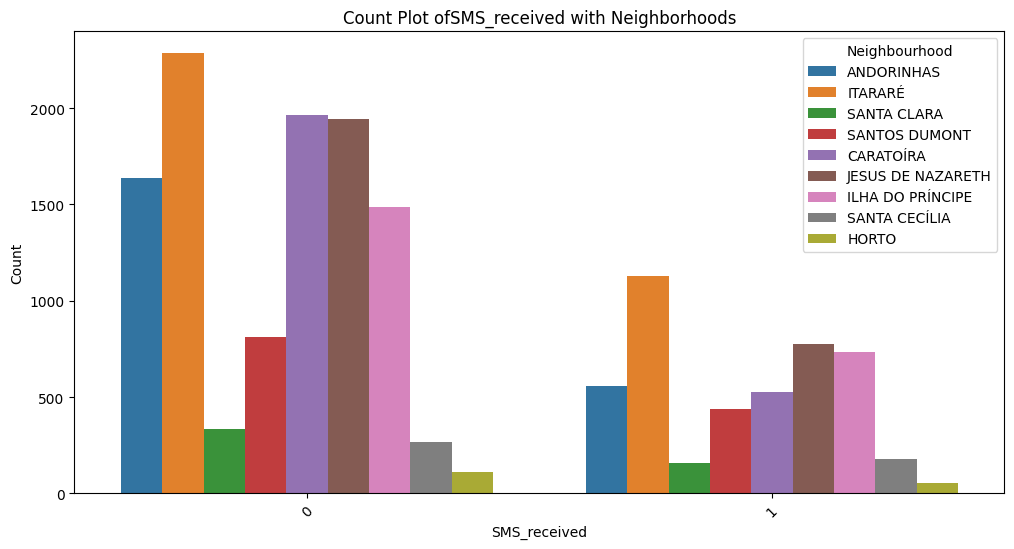

In [24]:
# List of neighborhoods to include
selected_neighborhoods = ['SANTOS DUMONT', 'SANTA CECÍLIA', 'SANTA CLARA', 'ITARARÉ', 'JESUS DE NAZARETH', 'HORTO', 'ILHA DO PRÍNCIPE', 'CARATOÍRA', 'ANDORINHAS']

# Filter the DataFrame to include only the selected neighborhoods
selected_neighborhood_df = newDf[newDf['Neighbourhood'].isin(selected_neighborhoods)]

columnsToPlot = ["ScheduledDayGroup", "ageGroup", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", "SMS_received"]

for column in columnsToPlot:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=selected_neighborhood_df, x=column, hue='Neighbourhood')
    plt.title('Count Plot of' + column +' with Neighborhoods')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Neighbourhood')
    plt.show()


##### Report : 

###### Scheduled from 2016-02-29 to 2016-03-31 for an appointment : JESUS DE NAZARETH, SANTOS DUMONT, ITARARÉ are more likely not showing up.
###### -------------------
###### Scheduled from 2016-03-31 to 2016-04-30 for an appointment : ITARARÉ, JESUS DE NAZARETH, CARATOÍRA, ANDORINHAS, ILHA DO PRÍNCIPE, SANTOS DUMONT are more likely not showing up.
###### -------------------
###### Scheduled from 2016-04-30 to 2016-05-31 for an appointment : ITARARÉ, ILHA DO PRÍNCIPE, JESUS DE NAZARETH, ANDORINHAS, CARATOÍRA, SANTOS DUMONT are more likely not showing up.

##### Report : 

##### From ITARARÉ, JESUS DE NAZARETH, CARATOÍRA, ILHA DO PRÍNCIPE, ANDORINHAS, SANTOS DUMONT 
###### Age group of 0 - 80 are more likely not showing up.
###### Non scholarship patients are more likely not showing up.
###### Who don't have hypertension are more likely not showing up.
###### Who don't have diabetes are more likely not showing up.
###### Non Alcoholic are more likely not showing up.
###### Who are not a Handicap are more likely not showing up.

##### Report : 

##### From ITARARÉ, CARATOÍRA, JESUS DE NAZARETH, ANDORINHAS, ILHA DO PRÍNCIPE
###### Both SMS receivers and non receivers are more likely not showing up.

In [25]:
# Let's find the correlation

# Apply feature scaling to "No-show" column
newDf["No-show"] = newDf["No-show"].replace({"Yes" : 1, "No" : 0})
newDf.head()

,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ageGroup,ScheduledDayGroup,AppointmentDayGroup
0,F,JARDIM DA PENHA,0,1,0,0,0,0,0,61 - 80,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
1,M,JARDIM DA PENHA,0,0,0,0,0,0,0,41 - 60,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
2,F,MATA DA PRAIA,0,0,0,0,0,0,0,61 - 80,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
3,F,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 - 20,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN
4,F,JARDIM DA PENHA,0,1,1,0,0,0,0,41 - 60,"(2016-03-31 07:13:56, 2016-04-30 07:13:56]",NaN


In [26]:
newDfDummies = pd.get_dummies(newDf)
plt.figure(figsize=(16, 6))
result = newDfDummies.astype(int).corr()["No-show"].sort_values(ascending=False)
result.iloc[ : 20]

No-show                                                         1.000000
ScheduledDayGroup_(2016-03-31 07:13:56, 2016-04-30 07:13:56]    0.148632
SMS_received                                                    0.127253
ScheduledDayGroup_(2016-02-29 07:13:56, 2016-03-31 07:13:56]    0.054007
ageGroup_21 - 40                                                0.041025
ageGroup_0 - 20                                                 0.037976
Scholarship                                                     0.029370
Neighbourhood_ITARARÉ                                           0.027339
Neighbourhood_SANTOS DUMONT                                     0.024008
AppointmentDayGroup_(2016-05-15, 2016-05-22]                    0.018591
Neighbourhood_JESUS DE NAZARETH                                 0.018471
AppointmentDayGroup_(2016-05-08, 2016-05-15]                    0.014560
ScheduledDayGroup_(2016-01-31 07:13:56, 2016-02-29 07:13:56]    0.013086
Neighbourhood_CARATOÍRA                            

<Figure size 1600x600 with 0 Axes>

<Axes: >

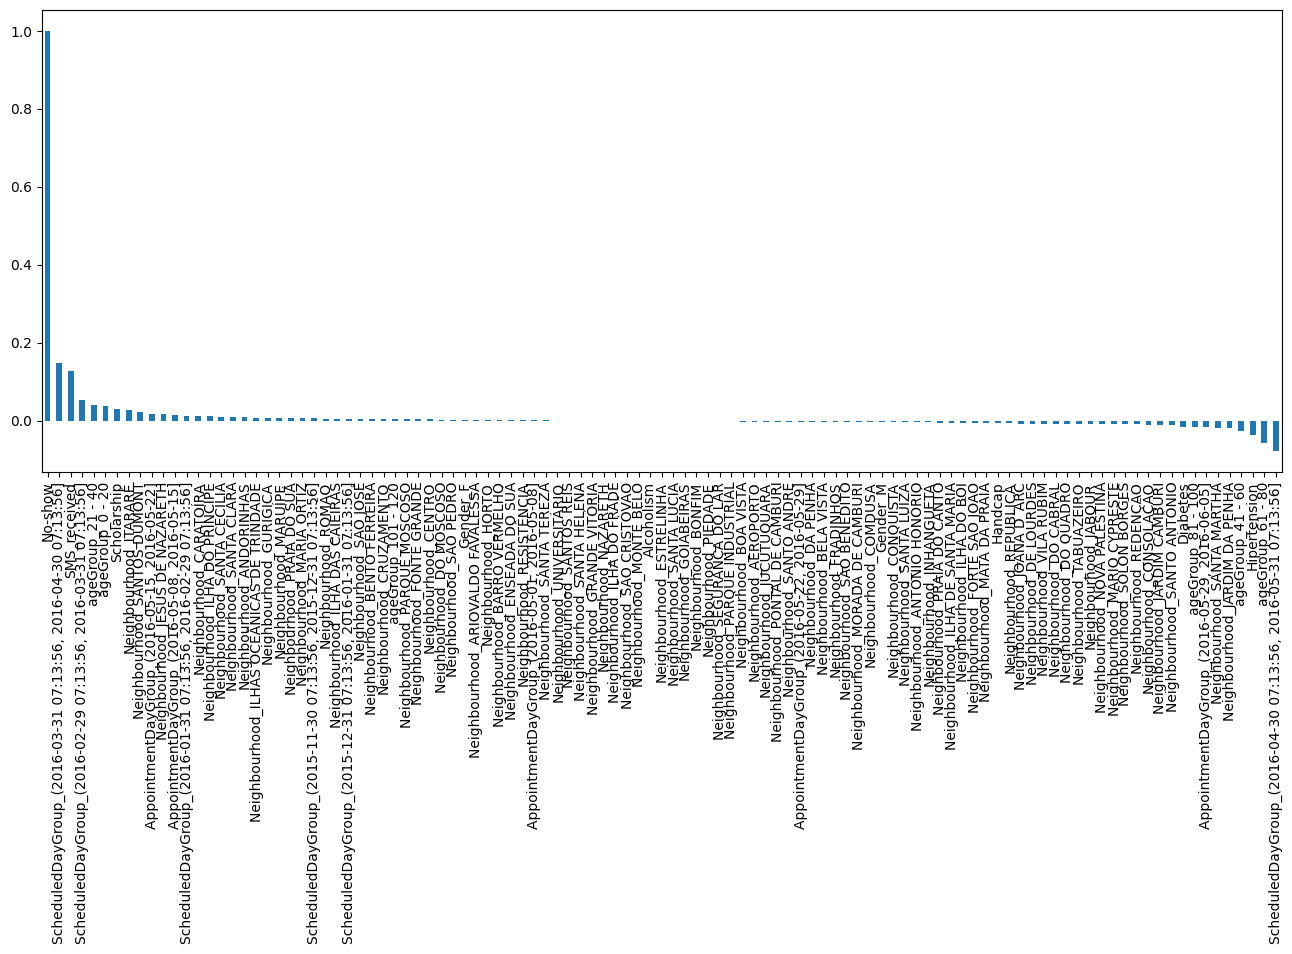

In [27]:
plt.figure(figsize=(16, 6))
result.plot(kind="bar")

##### Report : 

###### Correlation Analysis:

###### Limited Correlation Strength: The data exhibits predominantly weak correlations, with most values falling between -0.2 to 0.2.
###### Limited Insights: These modest correlations suggest that the relationships between variables are not strong, indicating that additional factors might influence appointment attendance beyond what's captured in this dataset.

### Conclusion : 

##### Gender Influence: Females are consistently more likely not to show up for appointments across various age groups and neighborhoods, as observed in the analysis.

##### Neighborhood Disparities: Specific neighborhoods, including ITARARÉ, JESUS DE NAZARETH, CARATOÍRA, ILHA DO PRÍNCIPE, ANDORINHAS, and SANTOS DUMONT, exhibit higher non-attendance rates. Targeted interventions in these regions are essential.

##### Health-Related Factors: Patients who don't have hypertension, diabetes, are not handicapped, alcoholic, and lack a scholarship are also more likely not to show up. These health-related trends reinforce the importance of tailored interventions.

##### SMS Reminder Paradox: An unexpected finding is that receiving SMS reminders does not necessarily improve appointment attendance. This counterintuitive observation calls for further investigation into the effectiveness of the reminder system.

##### Weak Correlations: The data shows primarily weak correlations, emphasizing that appointment attendance is influenced by multiple complex factors beyond what's captured in this dataset.